In [71]:
import talos
import os
import numpy as np
from code.preprocessing import prepare_te_data
from code.models.utils import SequenceGenerator
from scipy import stats
import seaborn as sns
import innvestigate
from deeplift.visualization import viz_sequence
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [5]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [6]:
BASE_PATH = 'code/output/hyperoptim/2020-04-18-13-04-33'
PACKAGE_PATH = f'{BASE_PATH}/cnn.zip'
REPORT_PATH = f'{BASE_PATH}/041820130702.csv'
RANDOM_SEED = 42

In [7]:
DATA_DIR = '../data/'
TE_PATH = os.path.join(DATA_DIR, 'csv', 'te_LMCN.v2.csv')
TE_SAMPLE_NAME = 'CN34_S5_r1_te.h.trim.uncontam'
RNA_PATH = os.path.join(DATA_DIR, 'csv', 'preprocessed.csv')

# Analyze

In [7]:
analyze = talos.Analyze(REPORT_PATH)
analyze.data.sort_values('val_rmse')

round_epochs  val_loss  val_rmse      loss      rmse  ...  epochs      lr  optimizer  pool_size      vocab_lengths
21           268  0.010934  0.027926  0.000219  0.010864  ...    1000  0.0100       adam          6  [5, 66, 23, None]
4            157  0.001629  0.029406  0.000463  0.015579  ...    1000  0.0001       adam          6  [5, 66, 23, None]
7            121  0.000462  0.034722  0.001780  0.029683  ...    1000  0.0001       adam          4  [5, 66, 23, None]
12           280  0.008789  0.034960  0.000542  0.017483  ...    1000  0.0010       adam          4  [5, 66, 23, None]
36           160  0.014331  0.035216  0.000518  0.017323  ...    1000  0.0010       adam          2  [5, 66, 23, None]
22           170  0.021579  0.035275  0.000670  0.018213  ...    1000  0.0010       adam          2  [5, 66, 23, None]
2            274  0.009352  0.036234  0.001023  0.021245  ...    1000  0.0001       adam          2  [5, 66, 23, None]
23           214  0.025306  0.037490  0.004496  0.041646  ...    1000  0.0010       adam          4  [5, 66, 23, None]
25           140  0.000585  0.039681  0.001198  0.024168  ...    1000  0.0001       adam          6  [5, 66, 23, None]
16           167  0.002234  0.040332  0.000835  0.021409  ...    1000  0.0001       adam          4  [5, 66, 23, None]
18           283  0.006936  0.040489  0.000417  0.015547  ...    1000  0.0001       adam          4  [5, 66, 23, None]
19           101  0.001984  0.040786  0.004489  0.041451  ...    1000  0.0001       adam          2  [5, 66, 23, None]
34           413  0.009355  0.044617  0.000245  0.011936  ...    1000  0.0100       adam          2  [5, 66, 23, None]
40           206  0.009409  0.049939  0.000476  0.016402  ...    1000  0.0010       adam          4  [5, 66, 23, None]
31           154  0.017550  0.051776  0.001128  0.024844  ...    1000  0.0001       adam          2  [5, 66, 23, None]
33           235  0.014263  0.052812  0.002268  0.033005  ...    1000  0.0010       adam          6  [5, 66, 23, None]
0            157  0.002638  0.055649  0.001518  0.027132  ...    1000  0.0010       adam          6  [5, 66, 23, None]
35           253  0.007008  0.056249  0.000567  0.018193  ...    1000  0.0100       adam          6  [5, 66, 23, None]
38           160  0.008956  0.056285  0.000341  0.013801  ...    1000  0.0100       adam          2  [5, 66, 23, None]
1            306  0.010930  0.069518  0.000398  0.014273  ...    1000  0.0100       adam          6  [5, 66, 23, None]
39           103  0.014177  0.072068  0.003191  0.035737  ...    1000  0.0001       adam          4  [5, 66, 23, None]
17           108  0.009573  0.079664  0.004498  0.041590  ...    1000  0.0010       adam          6  [5, 66, 23, None]
24           104  0.024614  0.083368  0.003274  0.036522  ...    1000  0.0001       adam          6  [5, 66, 23, None]
37           191  0.017994  0.086543  0.001900  0.029894  ...    1000  0.0100       adam          4  [5, 66, 23, None]
6            164  0.017287  0.094488  0.000968  0.022920  ...    1000  0.0010       adam          4  [5, 66, 23, None]
10           111  0.023349  0.112944  0.003494  0.036670  ...    1000  0.0010       adam          6  [5, 66, 23, None]
29           314  0.006984  0.118874  0.001788  0.029745  ...    1000  0.0100       adam          2  [5, 66, 23, None]
5            132  0.067438  0.192754  0.002525  0.033464  ...    1000  0.0001       adam          4  [5, 66, 23, None]
9            102  0.042294  0.227025  0.002663  0.034366  ...    1000  0.0001       adam          2  [5, 66, 23, None]
14           166  0.062560  0.230206  0.002599  0.033427  ...    1000  0.0100       adam          4  [5, 66, 23, None]
3            101  0.044912  0.261165  0.002549  0.033383  ...    1000  0.0010       adam          2  [5, 66, 23, None]
13           129  0.078812  0.262105  0.002580  0.033833  ...    1000  0.0100       adam          2  [5, 66, 23, None]
30           163  0.097855  0.306083  0.001872  0.029825  ...    1000  0.0010

In [8]:
analyze.low('val_rmse')

0.027925698086619374

In [9]:
analyze.correlate('val_rmse', exclude=[])

round_epochs     -0.402302
val_loss          0.959685
loss              0.262308
rmse              0.311307
batch_size        0.063514
conv_dropout      0.074910
conv_filters     -0.344282
conv_size         0.177246
dense_dim        -0.052662
dense_dropout     0.161953
embedding_size    0.198887
epochs                 NaN
lr                0.233250
pool_size        -0.008416
Name: val_rmse, dtype: float64

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


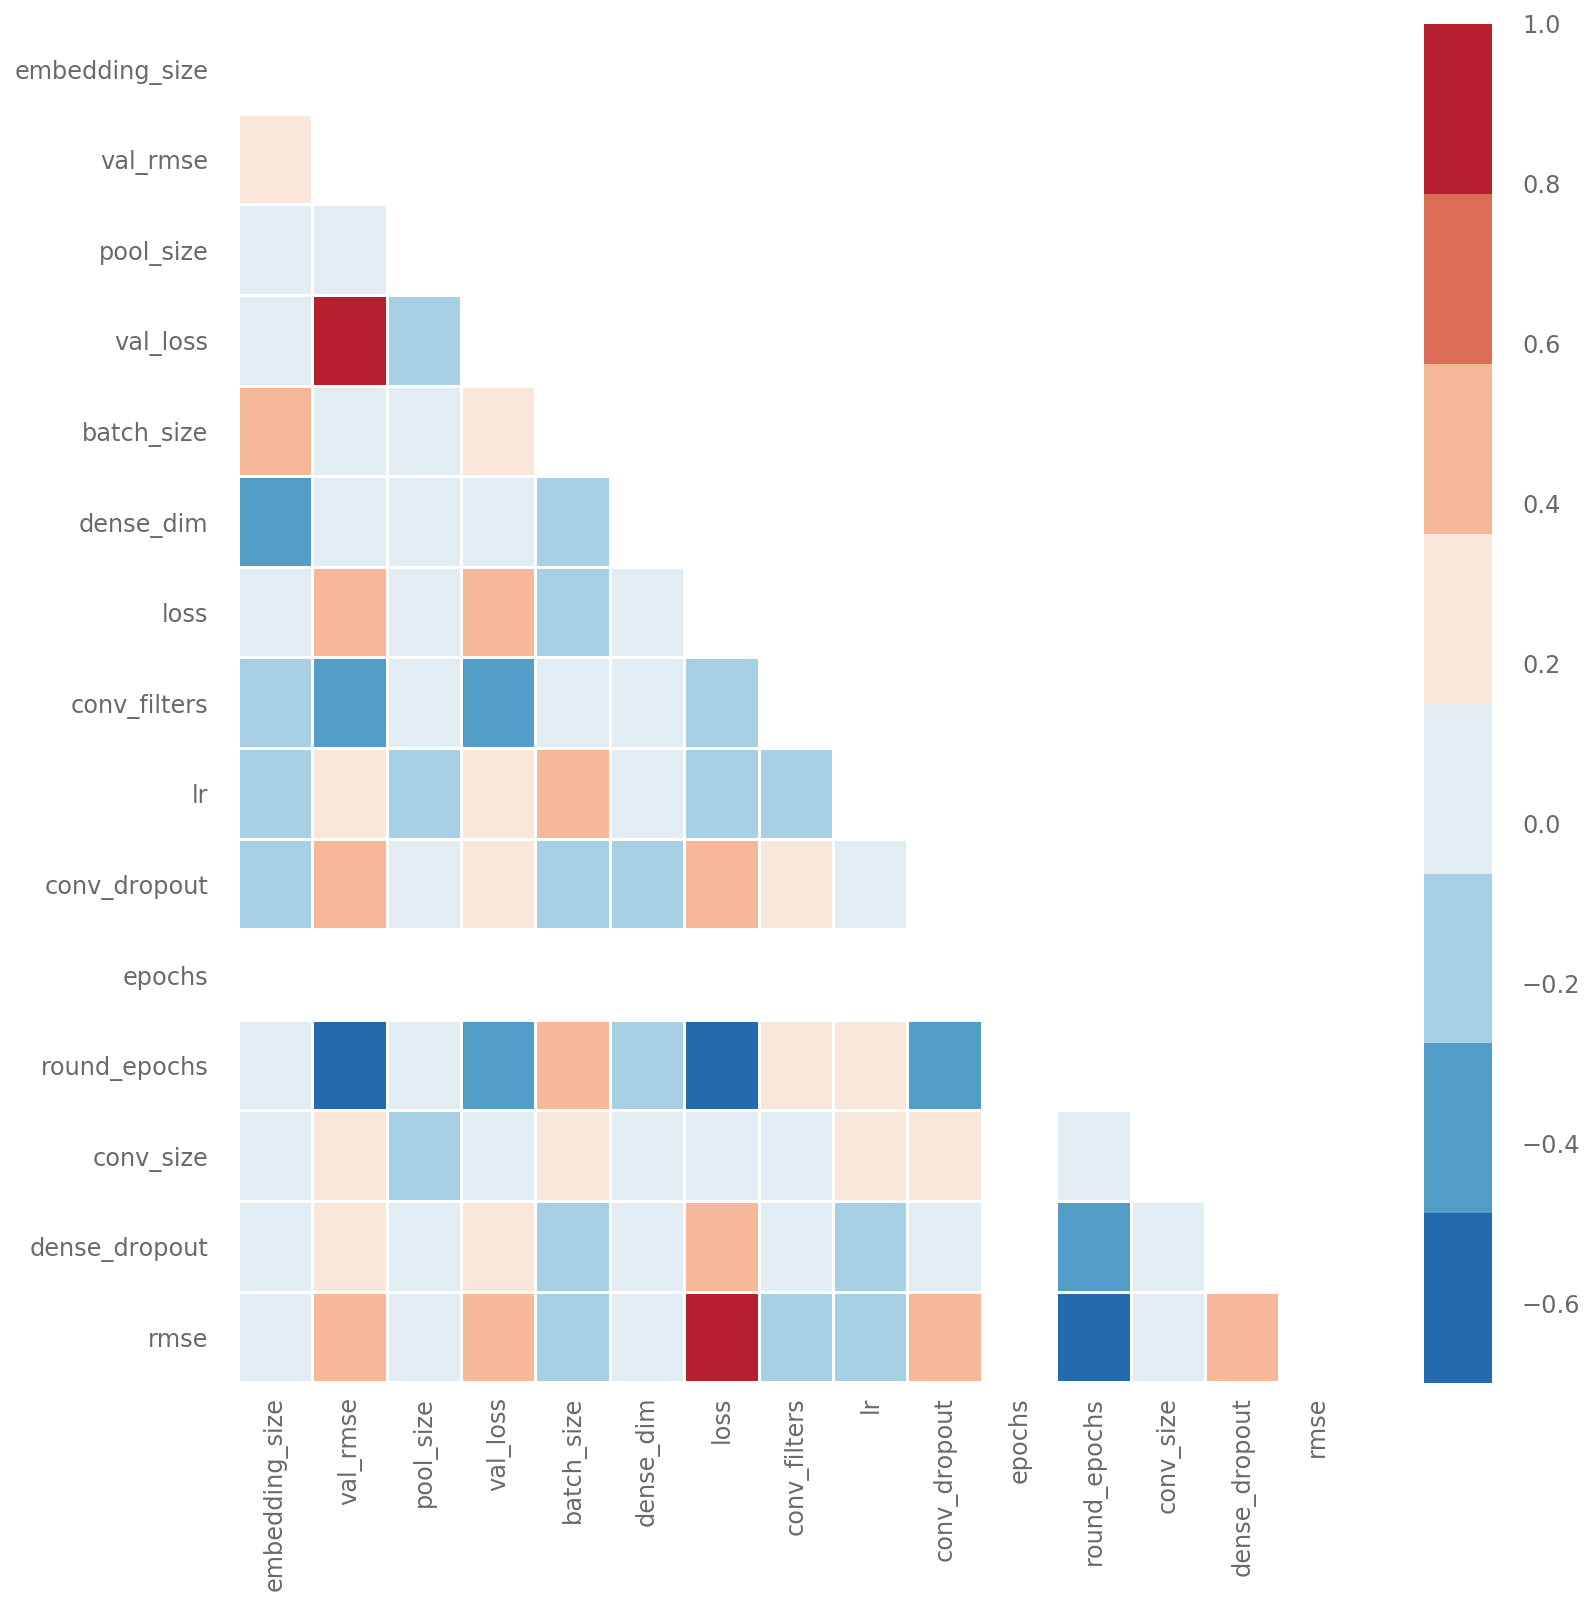

In [10]:
analyze.plot_corr('val_rmse', exclude=[])

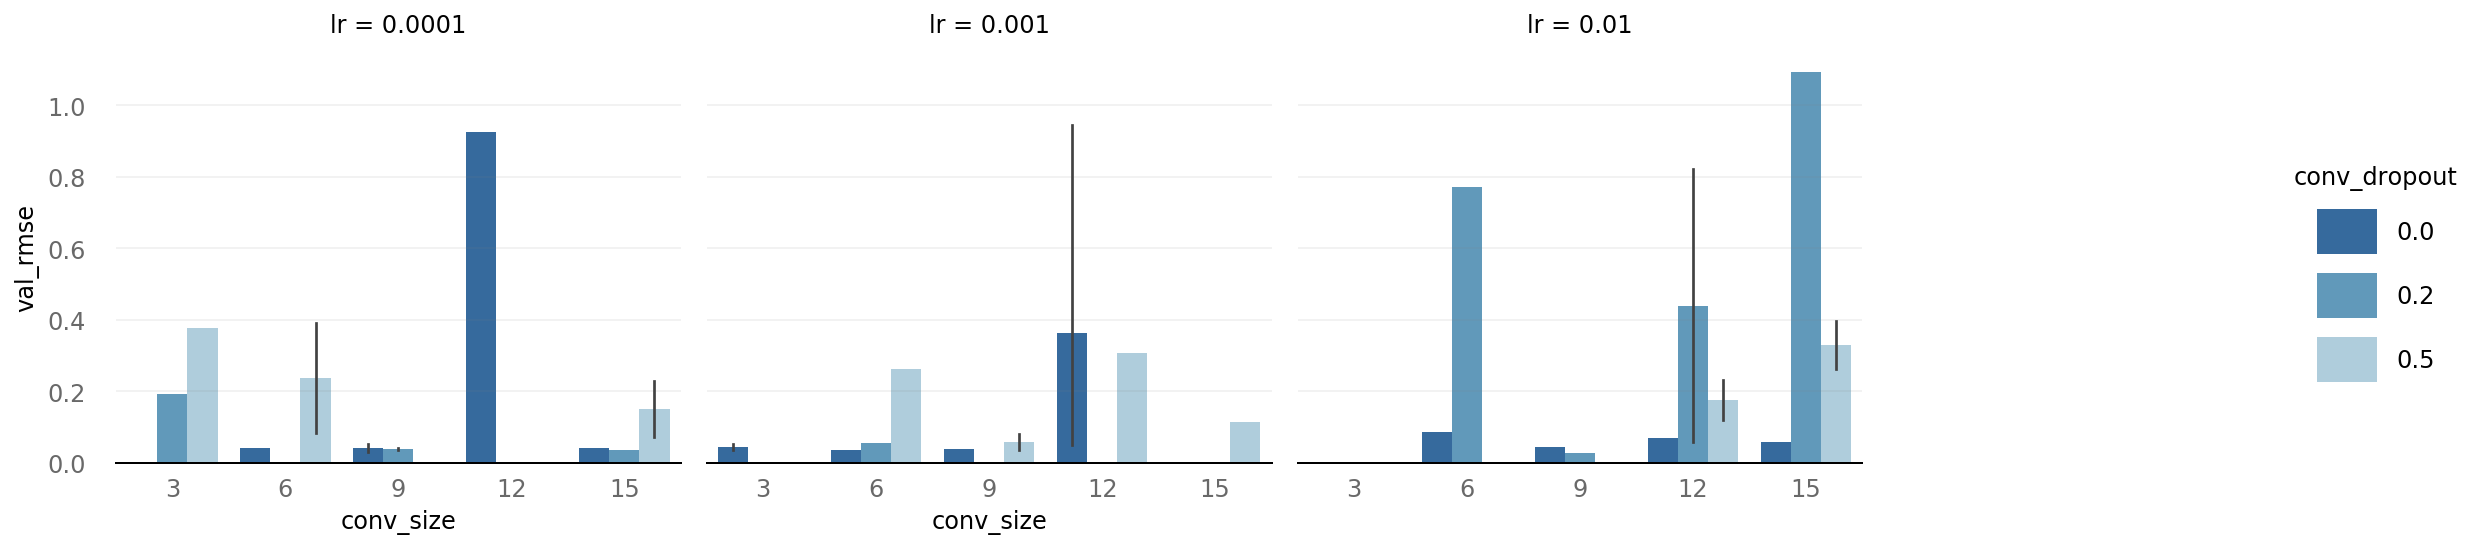

In [11]:
analyze.plot_bars('conv_size', 'val_rmse', 'conv_dropout', 'lr')

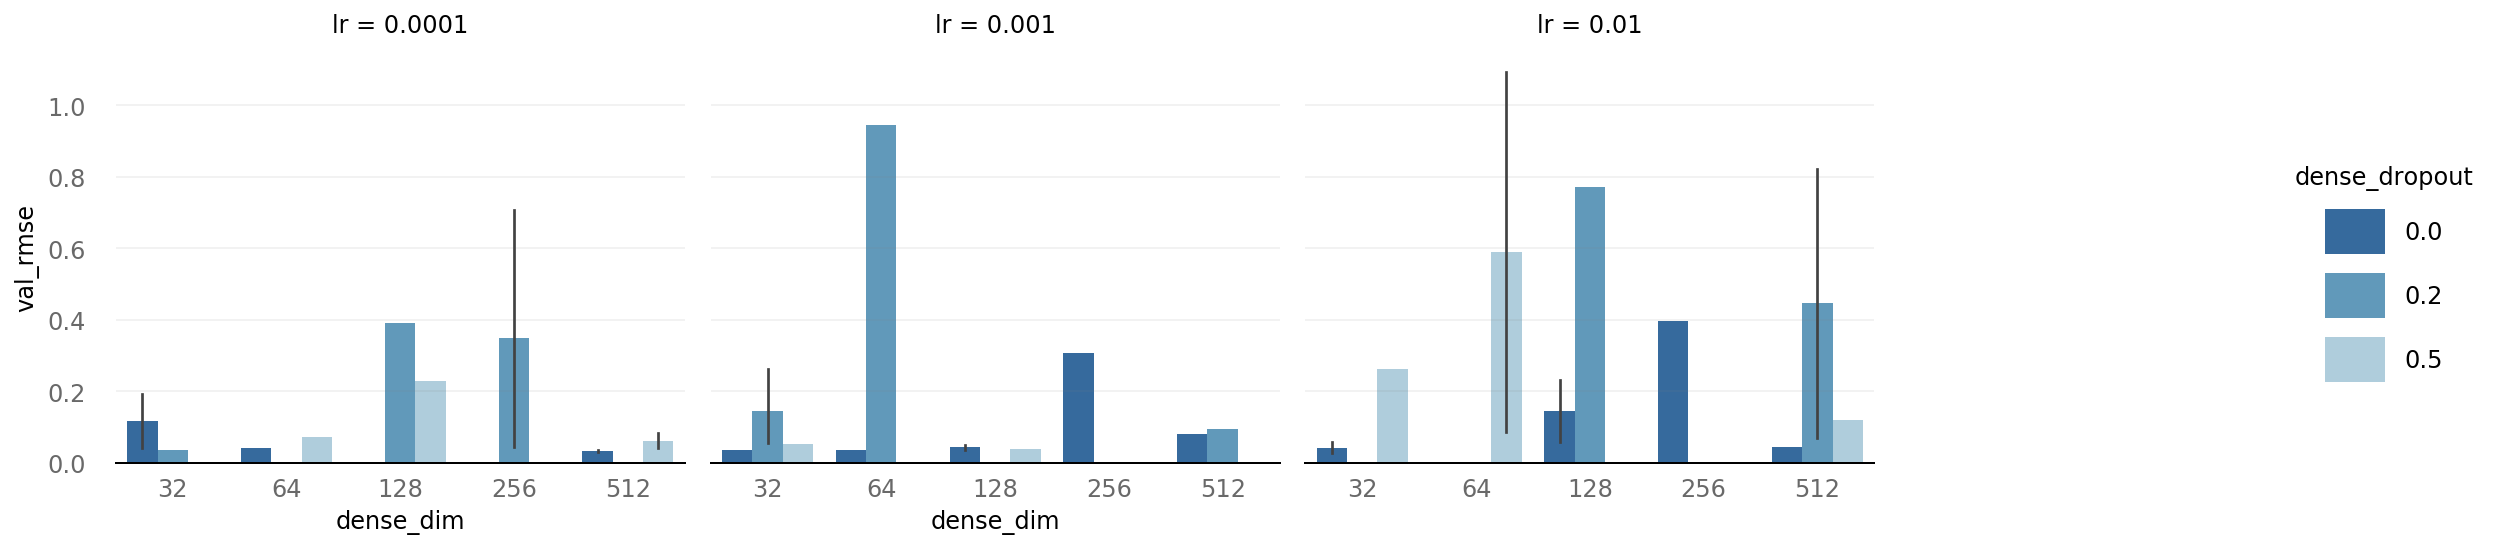

In [12]:
analyze.plot_bars('dense_dim', 'val_rmse', 'dense_dropout', 'lr')

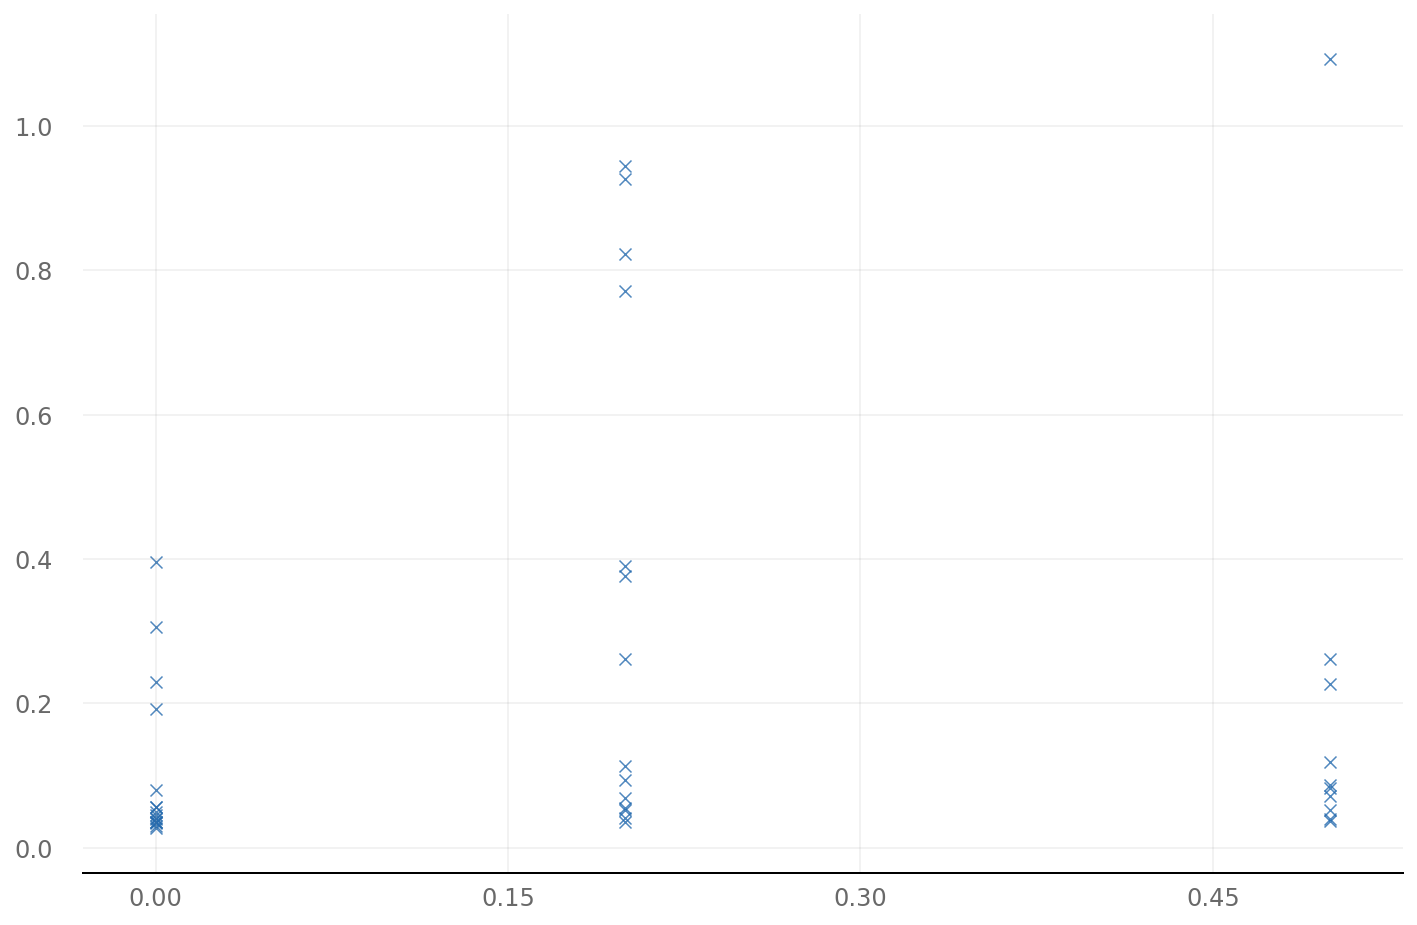

In [13]:
analyze.plot_regs('dense_dropout', 'val_rmse')

# Best Model

In [8]:
experiment = talos.Restore(PACKAGE_PATH)
experiment.details

0                                      1
0                   NaN                                      0
1       experiment_name  output/hyperoptim/2020-04-18-13-04-33
2         random_method                       uniform_mersenne
3      reduction_method                                    NaN
4    reduction_interval                                     50
5      reduction_window                                     20
6   reduction_threshold                                    0.2
7      reduction_metric                                val_acc
8         complete_time                         04/19/20/09:27
9               x_shape                              (7812, 4)
10              y_shape                                (7812,)

In [9]:
experiment.params

{'optimizer': ['adam'],
 'batch_size': [32, 64, 128, 256],
 'epochs': [1000],
 'lr': [0.0001, 0.001, 0.01],
 'vocab_lengths': [[5, 66, 23, None]],
 'embedding_size': [16, 32, 64],
 'conv_filters': [16, 32, 64, 128],
 'conv_size': [3, 6, 9, 12, 15],
 'pool_size': [2, 4, 6],
 'conv_dropout': [0, 0.2, 0.5],
 'dense_dim': [32, 64, 128, 256, 512],
 'dense_dropout': [0, 0.2, 0.5]}

In [10]:
x_train, y_train, x_val, y_val, x_test, y_test, word_indices = prepare_te_data(RNA_PATH, TE_PATH, TE_SAMPLE_NAME,
                                                                               max_length=6000, random_seed=RANDOM_SEED)

In [11]:
x_test.shape, y_test.shape

((965, 4), (965,))

In [12]:
def plot_reg(x, y, model):
    y_pred = model.predict_generator(SequenceGenerator(x, y))
    ax = sns.jointplot(np.log1p(y.ravel()), np.log1p(y_pred.ravel()),
                       kind='reg', stat_func=stats.spearmanr, marker='.');
    plt.xlabel('ground truth');
    plt.ylabel('prediction');

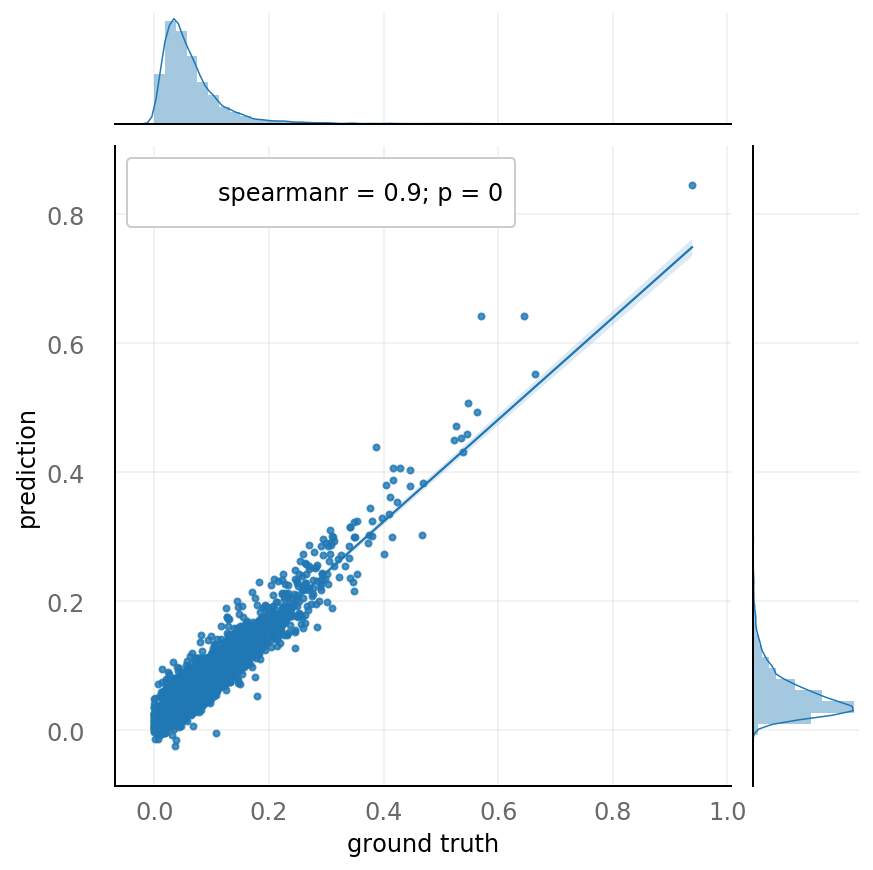

In [19]:
plot_reg(x_train, y_train, experiment.model)

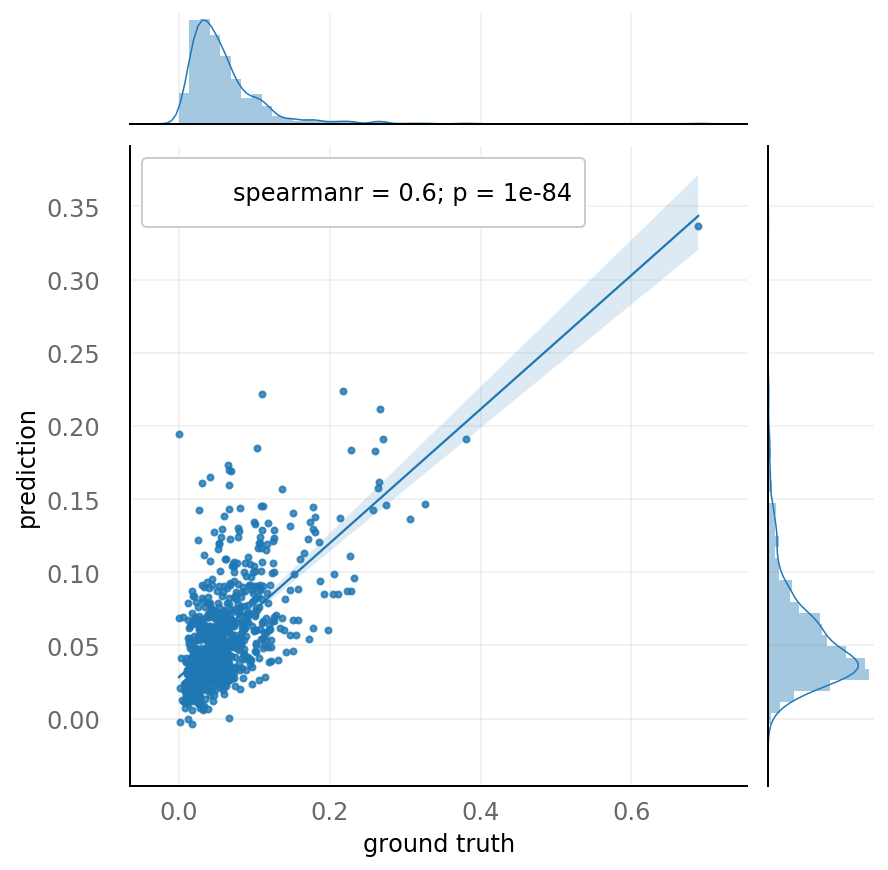

In [20]:
plot_reg(x_val, y_val, experiment.model)

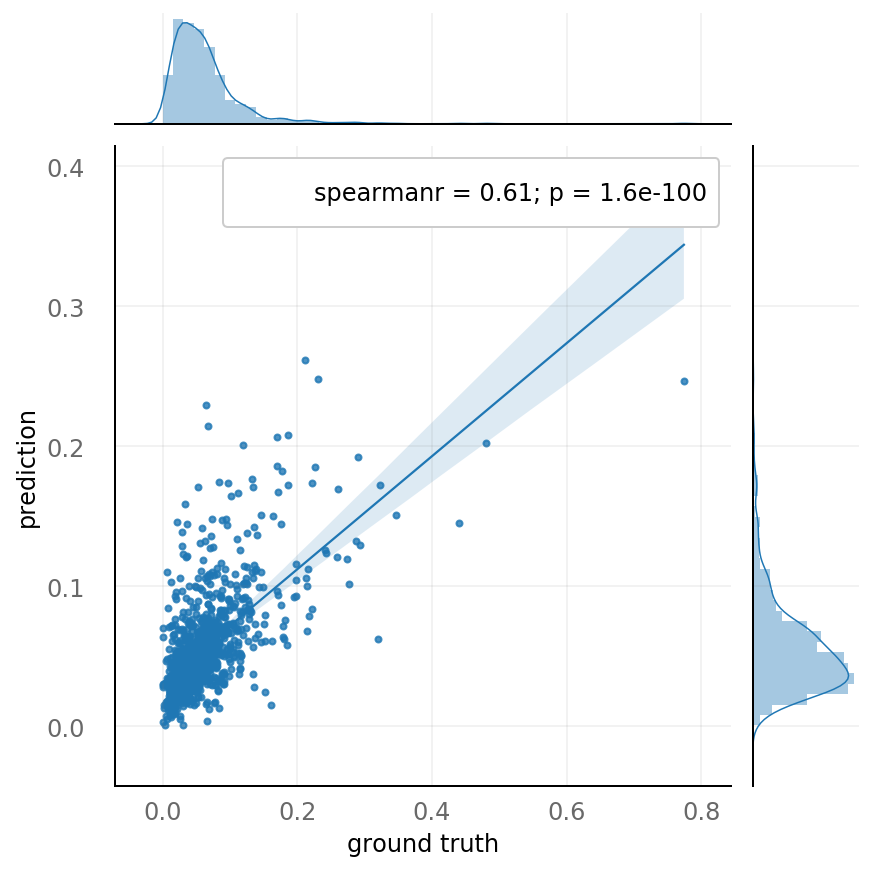

In [21]:
plot_reg(x_test, y_test, experiment.model)

## Let's see what features the model has learned

In [137]:
sorted_indices = y_test.sort_values(ascending=False).index

In [138]:
x_analyze, y_analyze = next(iter(SequenceGenerator(x_test.loc[sorted_indices], y_test.loc[sorted_indices], 32)))

In [139]:
analyzer = innvestigate.create_analyzer("lrp.sequential_preset_a_flat", experiment.model)
y_analyze_pred = analyzer.analyze(x_analyze)

in EmbeddingReverseLayer.init: Embedding -> Dedicated ReverseLayer class
in EmbeddingReverseLayer.init: Embedding -> Dedicated ReverseLayer class
in EmbeddingReverseLayer.init: Embedding -> Dedicated ReverseLayer class
[<tf.Tensor 'gradient_wrt_267/gradients/concatenate_1/concat_grad/Slice:0' shape=(?, ?, 16) dtype=float32>]
[<tf.Tensor 'gradient_wrt_267/gradients/concatenate_1/concat_grad/Slice_1:0' shape=(?, ?, 16) dtype=float32>]
[<tf.Tensor 'gradient_wrt_267/gradients/concatenate_1/concat_grad/Slice_2:0' shape=(?, ?, 16) dtype=float32>]


In [143]:
acgt = [word_indices['nucleotides'][i] for i in 'acgt']
x_analyze_onehot = keras.utils.to_categorical(x_analyze[0], 5)[:, :, acgt]

In [144]:
nuc_weights = x_analyze_onehot * y_analyze_pred[0].reshape(y_analyze_pred[0].shape + (1,))

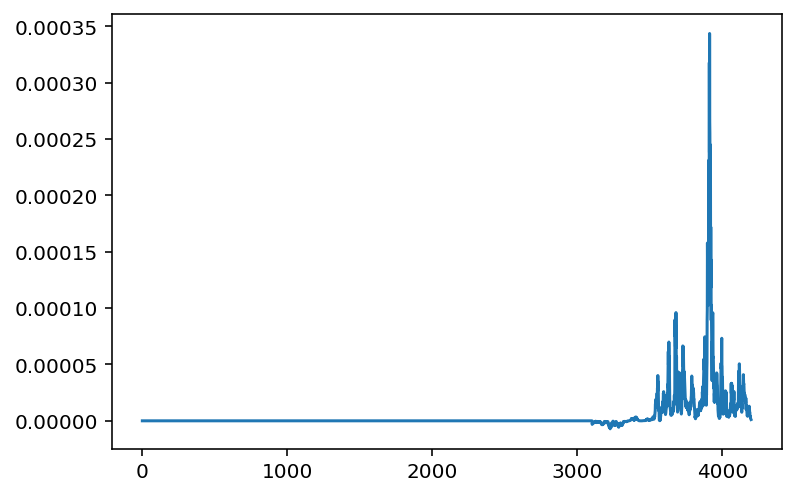

In [150]:
plt.plot(nuc_weights[0].sum(axis=1));

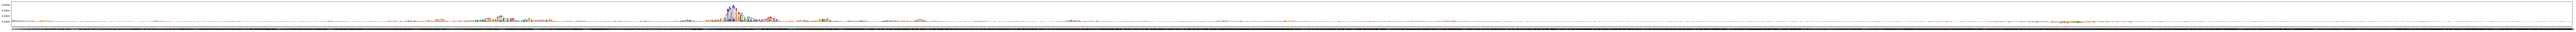

In [161]:
viz_sequence.plot_weights(nuc_weights[0][~np.isclose(nuc_weights[0].sum(axis=1), 0)], figsize=(200, 2))

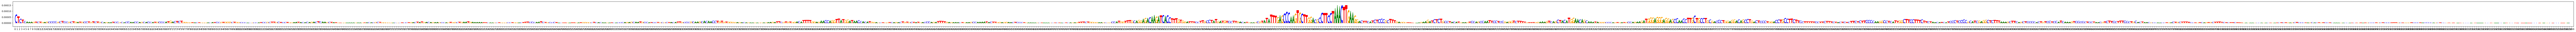

In [162]:
viz_sequence.plot_weights(nuc_weights[1][~np.isclose(nuc_weights[1].sum(axis=1), 0)], figsize=(200, 2))

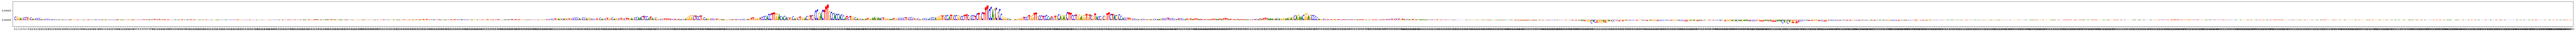

In [163]:
viz_sequence.plot_weights(nuc_weights[2][~np.isclose(nuc_weights[2].sum(axis=1), 0)], figsize=(200, 2))

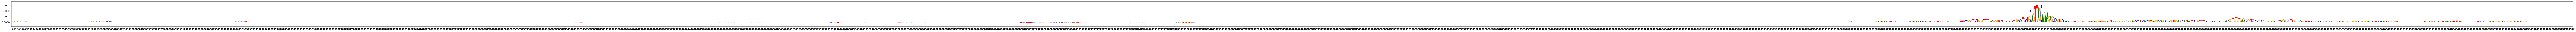

In [164]:
viz_sequence.plot_weights(nuc_weights[3][~np.isclose(nuc_weights[3].sum(axis=1), 0)], figsize=(200, 2))

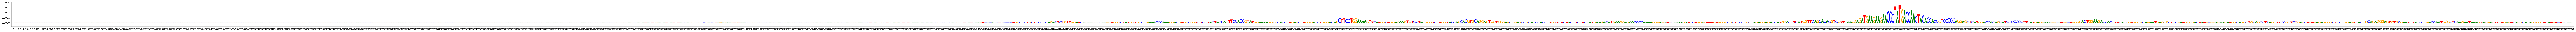

In [165]:
viz_sequence.plot_weights(nuc_weights[4][~np.isclose(nuc_weights[4].sum(axis=1), 0)], figsize=(200, 2))